<a href="https://colab.research.google.com/github/aparnagithb/Scoliosis_Detection_using_DeepLearning/blob/master/scol_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# Update the paths to your mounted Google Drive paths
#train_path= '/content/drive/MyDrive/Datasets (1)/Train'
train_path = '/content/drive/MyDrive/Datasets (1)/Train'
valid_path = '/content/drive/MyDrive/Datasets (1)/Test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets (1)/Train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test sets using flow_from_directory
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=16,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


58889256/58889256 [==============================] - 0s 0us/step
Found 230 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


<ipython-input-5-9b536537cce2>:67: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/16
8/8 [==============================] - 192s 23s/step - loss: 0.9569 - accuracy: 0.7000 - val_loss: 1.0700 - val_accuracy: 0.5172
Epoch 2/16
8/8 [==============================] - 165s 20s/step - loss: 0.4536 - accuracy: 0.8130 - val_loss: 0.2708 - val_accuracy: 0.9310
Epoch 3/16
8/8 [==============================] - 166s 20s/step - loss: 0.3231 - accuracy: 0.8739 - val_loss: 0.6067 - val_accuracy: 0.8276
Epoch 4/16
8/8 [==============================] - 188s 24s/step - loss: 0.3002 - accuracy: 0.8652 - val_loss: 0.3500 - val_accuracy: 0.8966
Epoch 5/16
8/8 [==============================] - 167s 21s/step - loss: 0.2263 - accuracy: 0.9043 - val_loss: 0.6270 - val_accuracy: 0.7931
Epoch 6/16
8/8 [==============================] - 169s 21s/step - loss: 0.1748 - accuracy: 0.9478 - val_loss: 0.2351 - val_accuracy: 0.9655
Epoch 7/16
8/8 [==============================] - 166s 21s/step - loss: 0.1347 - accuracy: 0.9522 - val_loss: 0.4644 - val_accuracy: 0.8276
Epoch 8/16
8/8 [====

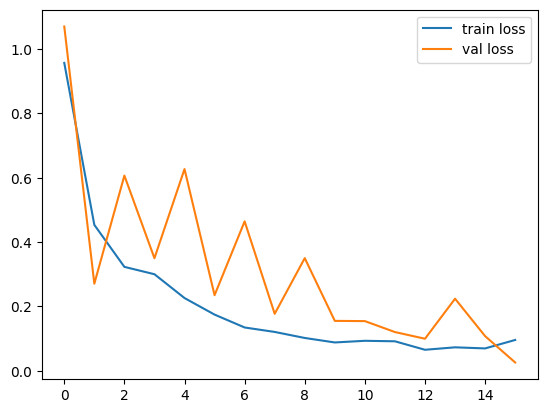

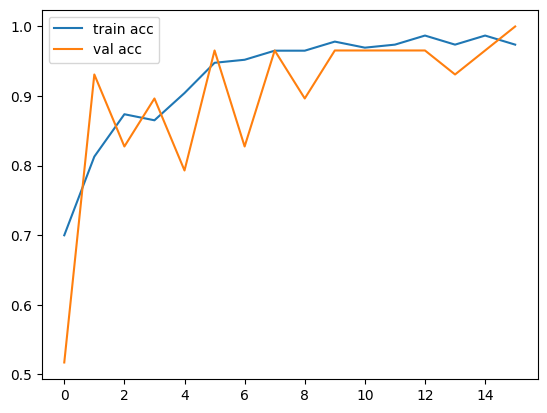

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

1/1 [==============================] - 18s 18s/step


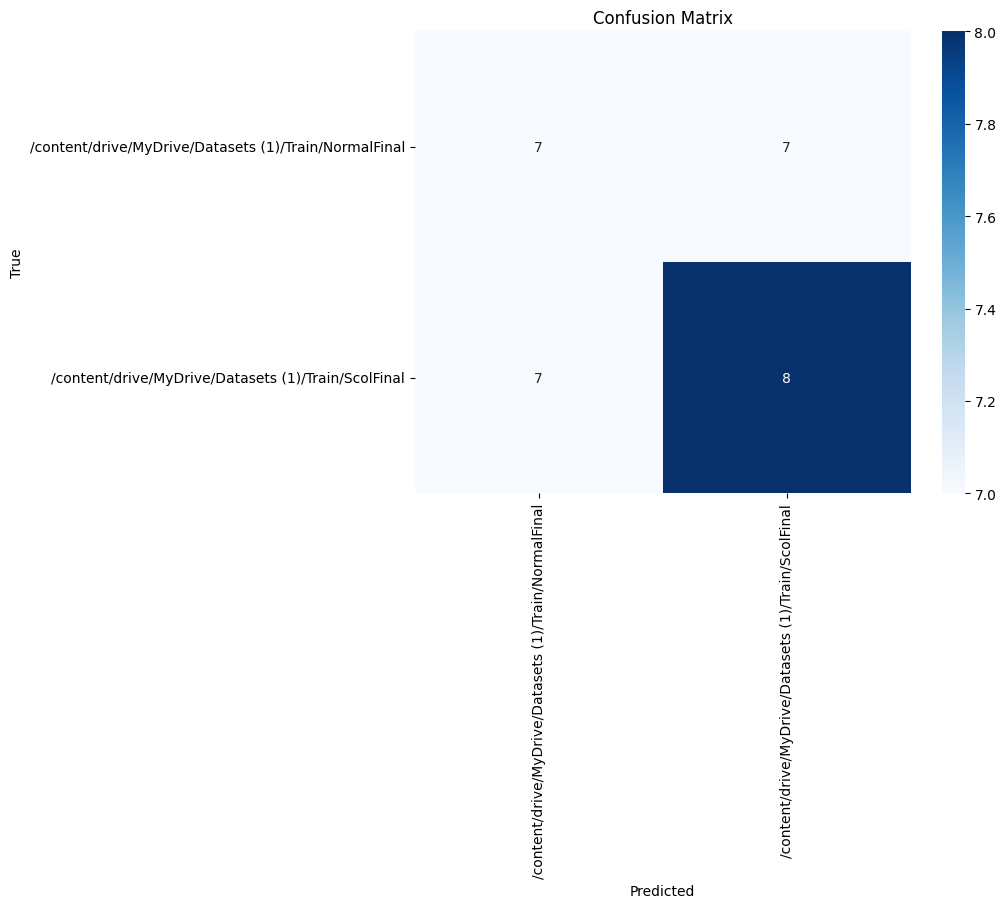

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Fit the model


# Get predictions
Y_pred = model.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=folders,
            yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


2/2 [==============================] - 36s 12s/step


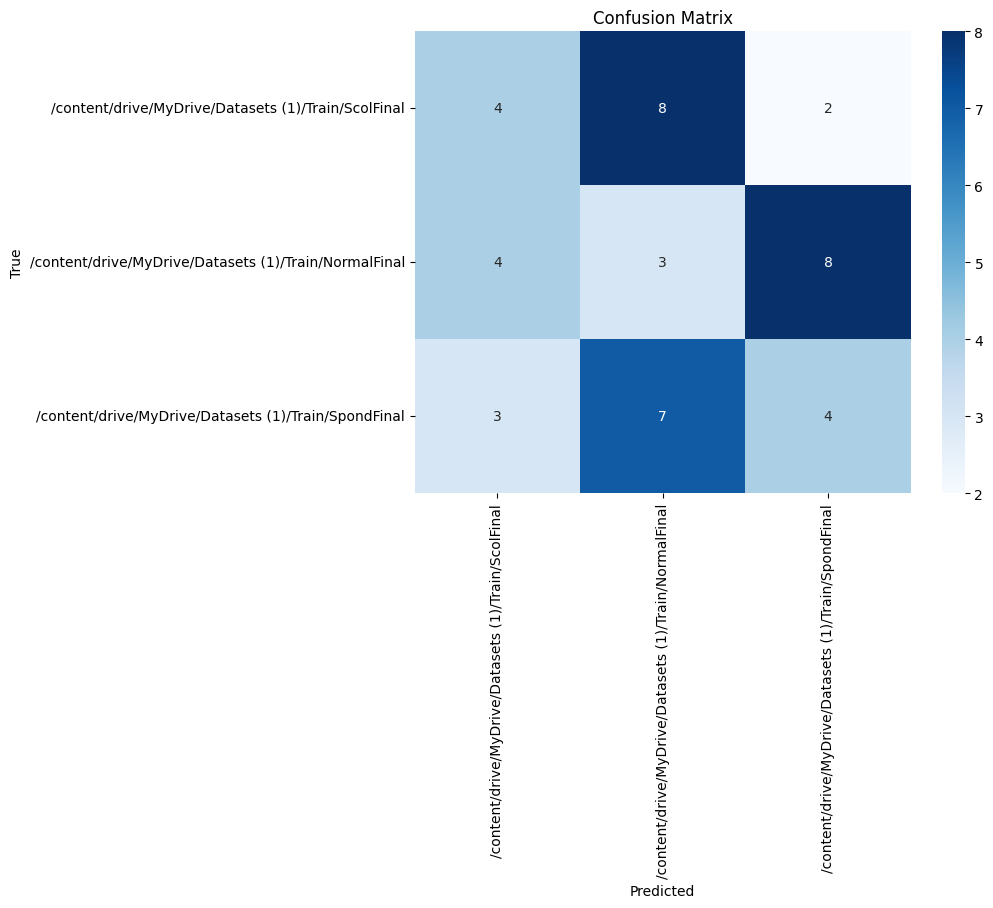

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# ...

# Fit the model


# Get predictions
Y_pred = model.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=folders,
            yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5172
Precision: 0.5172
Recall: 0.5172
F1 Score: 0.5172


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications import ResNet101V2

#from keras.applications.resneXt101 import ResNet50
#from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# Update the paths to your mounted Google Drive paths
#train_path= '/content/drive/MyDrive/Datasets (1)/Train'
train_path = '/content/drive/MyDrive/Datasets (1)/Train'
valid_path = '/content/drive/MyDrive/Datasets (1)/Test'

# add preprocessing layer to the front of VGG
vgg = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets (1)/Train/*')

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model2 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test sets using flow_from_directory
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Fit the model
r = model2.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=9,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Found 230 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


<ipython-input-7-a2d2ee2b6356>:69: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model2.fit_generator(


Epoch 1/9
8/8 [==============================] - 93s 9s/step - loss: 1.1730 - accuracy: 0.8348 - val_loss: 0.4995 - val_accuracy: 0.9655
Epoch 2/9
8/8 [==============================] - 74s 9s/step - loss: 0.4187 - accuracy: 0.9826 - val_loss: 2.1626 - val_accuracy: 0.8966
Epoch 3/9
8/8 [==============================] - 75s 9s/step - loss: 0.6236 - accuracy: 0.9609 - val_loss: 1.5604 - val_accuracy: 0.9655
Epoch 4/9
8/8 [==============================] - 75s 9s/step - loss: 0.3393 - accuracy: 0.9826 - val_loss: 2.0694 - val_accuracy: 0.8276
Epoch 5/9
8/8 [==============================] - 74s 9s/step - loss: 0.4153 - accuracy: 0.9783 - val_loss: 0.7396 - val_accuracy: 0.9655
Epoch 6/9
8/8 [==============================] - 73s 9s/step - loss: 0.2226 - accuracy: 0.9870 - val_loss: 0.2870 - val_accuracy: 0.9310
Epoch 7/9
8/8 [==============================] - 75s 9s/step - loss: 0.4295 - accuracy: 0.9783 - val_loss: 1.5474 - val_accuracy: 0.8966
Epoch 8/9
8/8 [==========================

1/1 [==============================] - 16s 16s/step


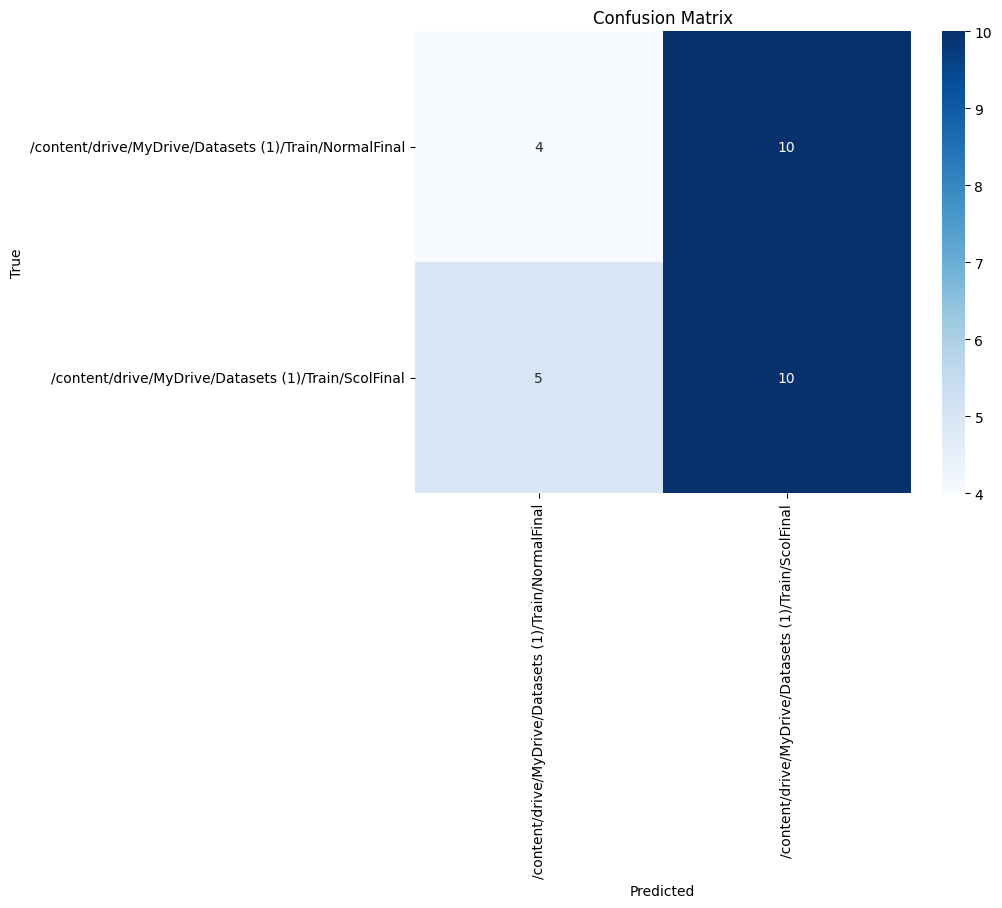

In [ ]:
Y_pred = model2.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=folders,
            yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.4828
Precision: 0.4732
Recall: 0.4828
F1 Score: 0.4635


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications import DenseNet201
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

# Update the paths to your mounted Google Drive paths
#train_path= '/content/drive/MyDrive/Datasets (1)/Train'
train_path = '/content/drive/MyDrive/Datasets (1)/Train'
valid_path = '/content/drive/MyDrive/Datasets (1)/Test'

# add preprocessing layer to the front of VGG
vgg = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


for i, layer in enumerate(vgg.layers):
    layer._name = 'densenet_layer_' + str(i)


# don't train existing weights

for layer in vgg.layers:
  layer.trainable = False

# useful for getting number of classes
folders = glob('/content/drive/MyDrive/Datasets (1)/Train/*')

# our layers - you can add more if you want
x = Flatten(name='my_flatten_layer')(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax',name='my_prediction_layer')(x)

# create a model object
model3 = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
model3.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use ImageDataGenerator to load and preprocess images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training and test sets using flow_from_directory
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# Fit the model
r = model3.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=32,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Found 230 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


<ipython-input-7-023ce44a3833>:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model3.fit_generator(


Epoch 1/32
8/8 [==============================] - 96s 10s/step - loss: 4.1784 - accuracy: 0.7435 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/32
8/8 [==============================] - 78s 10s/step - loss: 1.4441 - accuracy: 0.8261 - val_loss: 3.1190 - val_accuracy: 0.6207
Epoch 3/32
8/8 [==============================] - 78s 10s/step - loss: 0.6641 - accuracy: 0.9174 - val_loss: 0.1324 - val_accuracy: 0.9655
Epoch 4/32
8/8 [==============================] - 76s 10s/step - loss: 0.3739 - accuracy: 0.9609 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 5/32
8/8 [==============================] - 78s 11s/step - loss: 0.2510 - accuracy: 0.9739 - val_loss: 0.6548 - val_accuracy: 0.9655
Epoch 6/32
8/8 [==============================] - 77s 11s/step - loss: 0.2370 - accuracy: 0.9696 - val_loss: 0.3497 - val_accuracy: 0.9655
Epoch 7/32
8/8 [==============================] - 78s 10s/step - loss: 0.1317 - accuracy: 0.9826 - val_loss: 6.1660e-07 - val_accuracy: 1.0000
Epoch 8/32
8/8 [=======

In [ ]:
# Save the model architecture and weights separately
model3.save('please.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 13s 13s/step


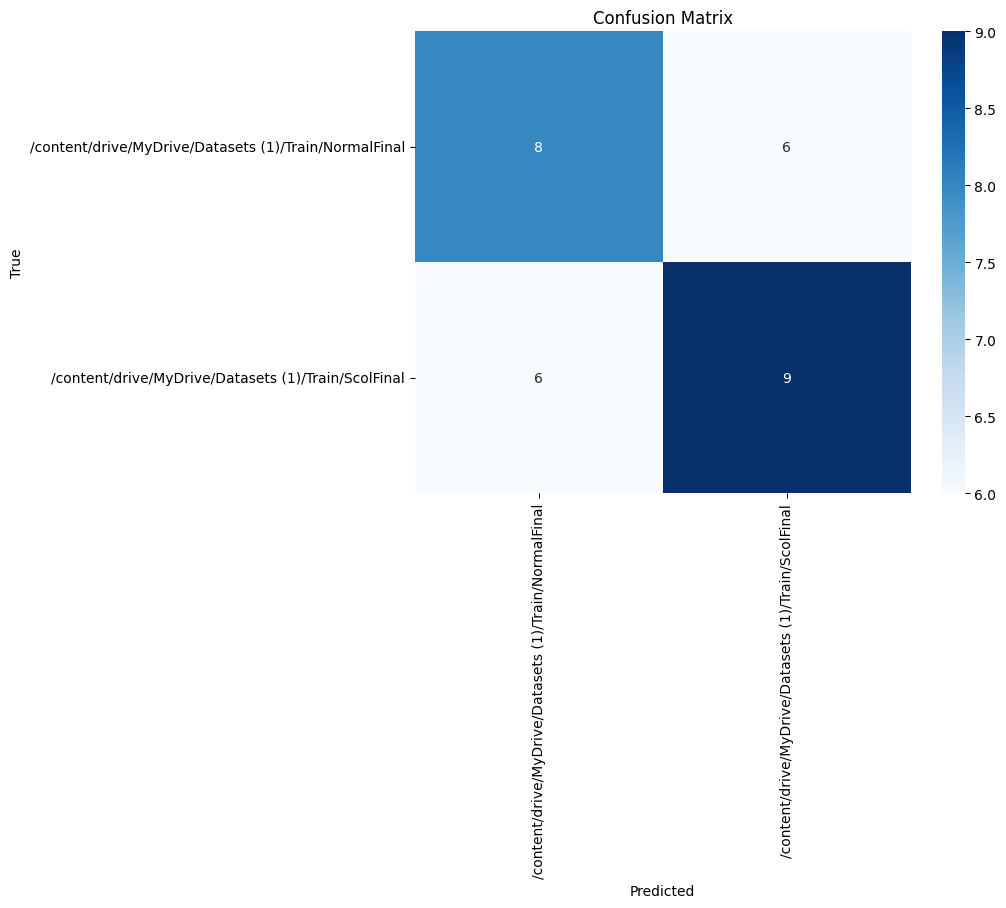

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
Y_pred = model3.predict(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_set.classes

# Generate confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=folders,
            yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

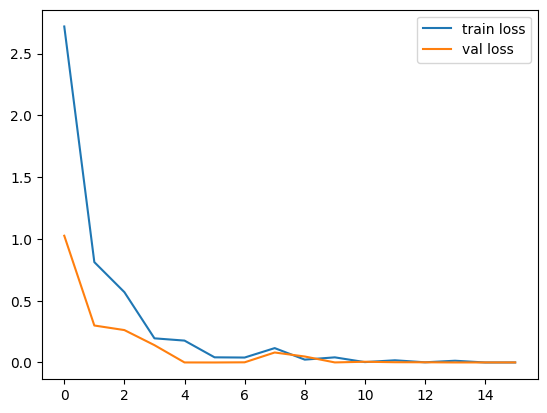

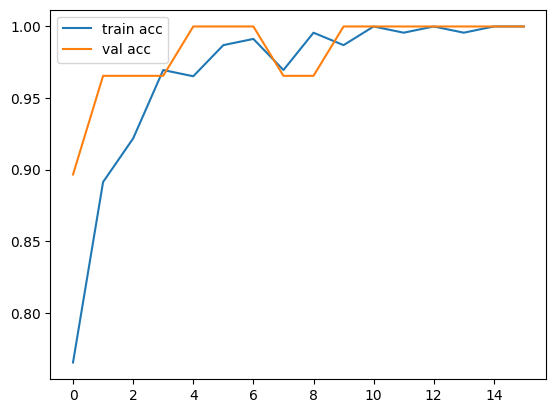

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.5862
Precision: 0.5862
Recall: 0.5862
F1 Score: 0.5862


1/1 [==============================] - 9s 9s/step


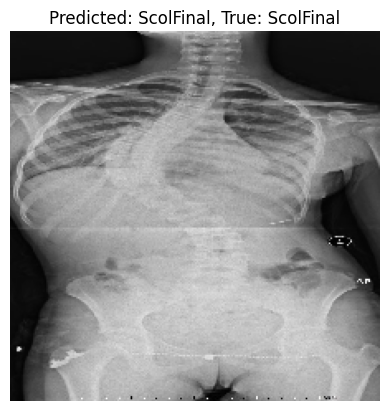

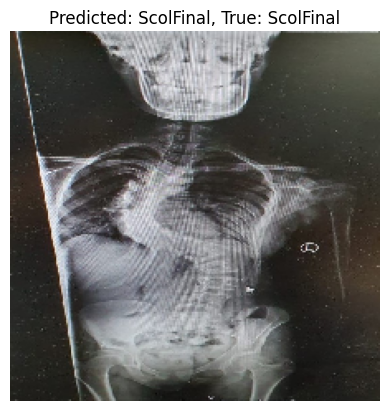

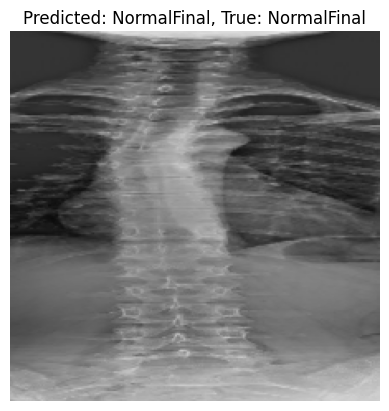

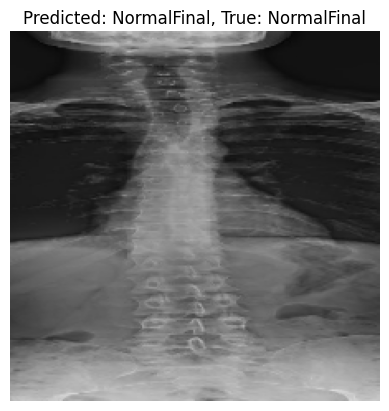

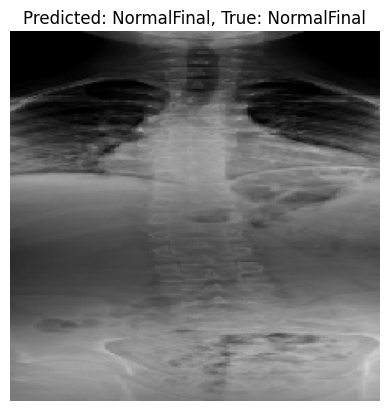

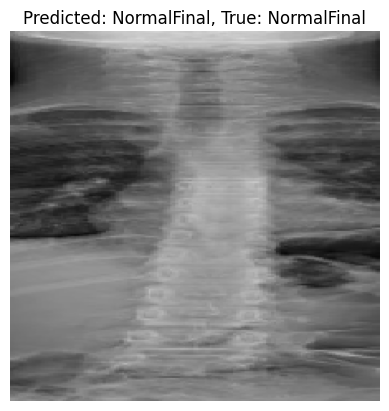

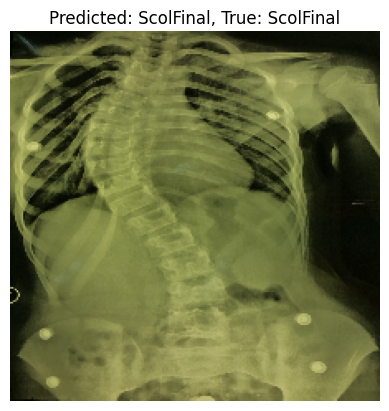

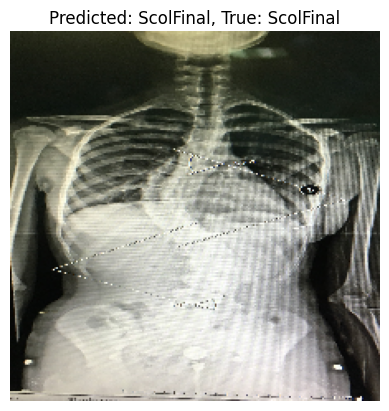

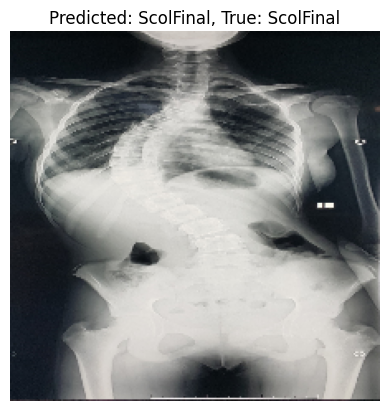

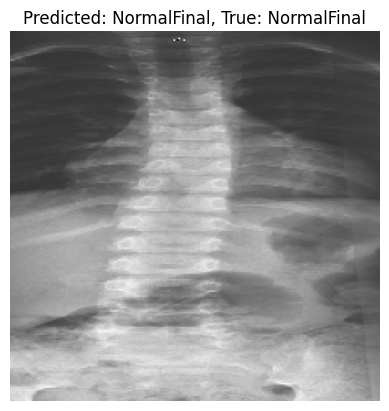

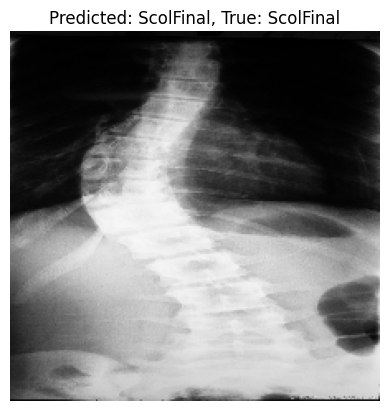

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# Generate predictions on the test set
predictions = model3.predict(test_set)

# Get class indices from the test set
class_indices = test_set.class_indices

# Get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Iterate over the test set and plot images where the model correctly predicts any class
for i, (images, labels) in enumerate(test_set):
    # Get predictions for the current batch
    batch_predictions = predictions[i * test_set.batch_size : (i + 1) * test_set.batch_size]
    # Iterate over the images in the batch
    for j in range(len(images)):
        # Get the predicted class index
        predicted_class_index = np.argmax(batch_predictions[j])
        # Get the true class index
        true_class_index = np.argmax(labels[j])
        # If the predicted class matches the true class, plot the image
        if predicted_class_index == true_class_index:
            plt.imshow(images[j])
            plt.title(f'Predicted: {class_labels[predicted_class_index]}, True: {class_labels[true_class_index]}')
            plt.axis('off')
            plt.show()
